# Life Expectancy worldwide


## by Yunpeng Cai

## Preliminary Wrangling

> The dataset related to life expectancy and other health factors for 193 countries collected from World Health Organization (WHO) and World Bank. We are going to explore the key factors which influence the life expectancy most for a certain country and see if we can build a linear regression model to predict life expectancy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data gathering

In [41]:
df_data=pd.read_csv("../Life Expectancy Data.csv")

In [42]:
pd.set_option('display.max_columns', 25)
df_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [43]:
df_data.shape

(2938, 22)

In [44]:
df_data.Country.nunique()

193

In [45]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [49]:
df_data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

### Structure of dataset
> The `Life Expectancy Data` contains 22 columns and 2938 rows with only a few null values. Dataframe contains data from year 2000 to 2015 of 193 different countries. `Country`, `Year` and `Status` are categrocal variables and others are numerical variables.

### The main feature of interest?

>  The `Life expectancy` column will be the main response variable to investigate. We are looking forwarding to finding out the relevant factors for a high life expectancy

### What features will help the investigation of the `life-expectancy`?

> The **life expectancy** is  assoicated with the healthcare system and living standard one country can offer. Thus, the economic factors could have a crucial effect and `Status`, `GDP` will be analysed first. Next, we can imagine a high children death ratio will greatly lower the total life range and investigate the `under-five-deaths` will make sense.  Linear regression models will be used to determine which factor plays a more important role.

## Univariate Exploration

## Data wrangling


##### Strip the white spaces at both ends of column names and replace the whitespace in the middle with dash line. All column names are now in lowercase.

In [46]:
df=df_data.copy()
df.rename(str.lower, axis='columns', inplace=True)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '-')

In [96]:
df.head(10)

country  year      status  life-expectancy  adult-mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   
5  Afghanistan  2010  Developing             58.8            279.0   
6  Afghanistan  2009  Developing             58.6            281.0   
7  Afghanistan  2008  Developing             58.1            287.0   
8  Afghanistan  2007  Developing             57.5            295.0   
9  Afghanistan  2006  Developing             57.3            295.0   

   infant-deaths  alcohol  percentage-expenditure  hepatitis-b  measles   bmi  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   
5             74     0.01               79.679367         66.0     1989  16.7   
6             77     0.01               56.762217         63.0     2861  16.2   
7             80     0.03               25.873925         64.0     1599  15.7   
8             82     0.02               10.910156         63.0     1141  15.2   
9             84     0.03               17.171518         64.0     1990  14.7   

   under-five-deaths  polio  total-expenditure  diphtheria  hiv/aids  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   
5                102   66.0               9.20        66.0       0.1   
6                106   63.0               9.42        63.0       0.1   
7                110   64.0               8.33        64.0       0.1   
8                113   63.0               6.73        63.0       0.1   
9                116   58.0               7.43        58.0       0.1   

          gdp  population  thinness--1-19-years  thinness-5-9-years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   
5  553.328940   2883167.0                  18.4                18.4   
6  445.893298    284331.0                  18.6                18.7   
7  373.361116   2729431.0                  18.8                18.9   
8  369.835796  26616792.0                  19.0                19.1   
9  272.563770   2589345.0                  19.2                19.3   

   income-composition-of-resources  schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1

#### Plot a `life-expectancy` histogram based on the describe information above, make sure to include both the min and max values with a appropriate bin number.

### Overview of life expectancy in the world

In [426]:
bin_edges=np.arange(36, 90, 0.5)
plt.hist(df['life-expectancy'], bins=bin_edges)
plt.xlabel('Life expectancy (year)')
plt.ylabel('Count')
plt.title('Distribution of life expectancy worldwide')

Text(0.5,1,'Distribution of life expectancy worldwide')

- The life expectancy histogram is as expected, which increases first then decreases with a peak between 70 and 80 years.
- Notice that this histgram contains data from different years, which counts some countries more than once. We can select a year or use a mean value to investigate each country later.

#### In the 193 countries, count the numbers of developing and developed countries

Text(0.5,1,'Number of developing and developed countries worldwide')

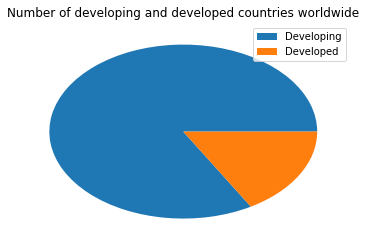

In [429]:
country_class=df.groupby(['country','status']).status.unique().value_counts()
pielabels=['Developing', 'Developed']
plt.pie(country_class)
plt.legend(pielabels)
plt.title('Number of developing and developed countries worldwide')

- Most of the countries (83.4 %) are developing countries, which will countribute more in the life expectancy distribution and is more representive of the world.
- We can consider to use the `status` as a indicator to predict for `life-expectancy`.

#### By looking at the GDP, it is found that the dataset has a lot of outlier values. By selectively compared some countries with the data from wikipedia, I believe the author stripped all the '0's out as a mistake in the `gdp` column.

In [112]:
# GDP data from world bank. http://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv
gdp_data=pd.read_csv("../GDP_world_bank.csv")

In [121]:
gdp_data.columns = gdp_data.columns.str.strip()
gdp_data.columns = gdp_data.columns.str.replace(' ', '-')
gdp_data.head()

Country-Name Country-Code                Indicator-Name  Indicator-Code  \
0        Aruba          ABW  GDP per capita (current US$)  NY.GDP.PCAP.CD   
1  Afghanistan          AFG  GDP per capita (current US$)  NY.GDP.PCAP.CD   
2       Angola          AGO  GDP per capita (current US$)  NY.GDP.PCAP.CD   
3      Albania          ALB  GDP per capita (current US$)  NY.GDP.PCAP.CD   
4      Andorra          AND  GDP per capita (current US$)  NY.GDP.PCAP.CD   

        1960       1961       1962       1963       1964        1965  \
0        NaN        NaN        NaN        NaN        NaN         NaN   
1  59.777327  59.878153  58.492874  78.782758  82.208444  101.290471   
2        NaN        NaN        NaN        NaN        NaN         NaN   
3        NaN        NaN        NaN        NaN        NaN         NaN   
4        NaN        NaN        NaN        NaN        NaN         NaN   

         1966     1967      ...               2006          2007  \
0         NaN      NaN      ...       24014.944270  25921.026050   
1  137.899362  161.322      ...         272.563077    369.835796   
2         NaN      NaN      ...        2062.415212   2878.837305   
3         NaN      NaN      ...        3005.012903   3603.013685   
4         NaN      NaN      ...       43748.772160  48582.808460   

           2008          2009          2010          2011          2012  \
0  27546.899390  24631.434860  24271.940420  25324.720360           NaN   
1    373.361116    445.893298    553.300289    603.537023    669.009051   
2   3868.579014   3347.844900   3531.416878   4299.008136   4539.467689   
3   4370.539647   4114.136545   4094.358832   4437.178068   4247.614308   
4  47785.659090  43339.379870  39736.354060  41098.766940  38391.080870   

           2013          2014          2015          2016          2017  
0           NaN           NaN           NaN           NaN           NaN  
1    638.612543    629.345250    569.577923    561.778746    585.850064  
2   4804.633826   4707.578098   3683.552607   3308.772828   4170.312280  
3   4413.081697   4578.666728   3952.830781   4131.872341   4537.862492  
4  40619.711300  42294.994730  36038.267600  37231.815670  39146.548840  

[5 rows x 62 columns]

In [225]:
set(df.country.unique())-set(gdp_data['Country-Name'].unique())

['Venezuela (Bolivarian Republic of)',
 'Czechia',
 'Bahamas',
 "Democratic People's Republic of Korea",
 'Yemen',
 'United States of America',
 'Congo',
 'Egypt',
 'Gambia',
 'Democratic Republic of the Congo',
 'Bolivia (Plurinational State of)',
 'Swaziland',
 'Slovakia',
 "Côte d'Ivoire",
 'Saint Vincent and the Grenadines',
 'Micronesia (Federated States of)',
 "Lao People's Democratic Republic",
 'Saint Lucia',
 'The former Yugoslav republic of Macedonia',
 'Viet Nam',
 'Republic of Moldova',
 'Kyrgyzstan',
 'United Kingdom of Great Britain and Northern Ireland',
 'Republic of Korea',
 'United Republic of Tanzania',
 'Iran (Islamic Republic of)',
 'Cook Islands',
 'Niue',
 'Saint Kitts and Nevis']

#### Unify the country names of `gdp_data` table according to the `df` table

In [226]:
gdp_data['Country-Name'].replace({'Venezuela, RB': 'Venezuela (Bolivarian Republic of)', 'Czech Republic': 'Czechia', 'Bahamas, The': 'Bahamas',
                                 'Korea, Dem. People’s Rep.': 'Democratic People\'s Republic of Korea','Yemen, Rep.':'Yemen','United States':'United States of America',
                                'Congo, Rep.':'Congo', 'Egypt, Arab Rep.':'Egypt','Gambia, The':'Gambia', 'Congo, Dem. Rep.':'Democratic Republic of the Congo',
                                'Bolivia':'Bolivia (Plurinational State of)','Eswatini':'Swaziland','Slovak Republic':'Slovakia','Cote d\'Ivoire':"Côte d'Ivoire",
                                'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines','Micronesia, Fed. Sts.':'Micronesia (Federated States of)',
                                'Lao PDR': "Lao People's Democratic Republic",'St. Lucia':'Saint Lucia','Macedonia, FYR':'The former Yugoslav republic of Macedonia',
                                'Vietnam': 'Viet Nam','Moldova':'Republic of Moldova','Kyrgyz Republic':'Kyrgyzstan','United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
                                'Korea, Rep.':'Republic of Korea','Tanzania': 'United Republic of Tanzania','Iran, Islamic Rep.':'Iran (Islamic Republic of)',
                                'St. Kitts and Nevis':'Saint Kitts and Nevis'}, inplace=True)

In [213]:
df['country'].value_counts().index

Index(['Armenia', 'Suriname', 'Venezuela (Bolivarian Republic of)', 'Ireland',
       'Malaysia', 'Mauritania', 'Tunisia', 'Azerbaijan', 'Comoros', 'Israel',
       ...
       'Monaco', 'Tuvalu', 'Palau', 'Cook Islands', 'Dominica', 'Niue',
       'San Marino', 'Marshall Islands', 'Nauru', 'Saint Kitts and Nevis'],
      dtype='object', length=193)

#### Replace the `gdp` values in the `df` table with the new data collected from world bank and did not add new rows as we do not have values for other columns.

In [238]:
for index in df.index:
    country= df.loc[index, 'country']
    year=df.loc[index, 'year']
    if country in gdp_data['Country-Name'].values:
        gdp=gdp_data.loc[gdp_data['Country-Name']==country][('{}'.format(year))]
        df.at[index, 'gdp']=gdp

In [241]:
df.gdp.describe()

count      2876.000000
mean      10812.049037
std       16712.275351
min         111.363436
25%        1015.906886
50%        3619.299864
75%       12217.521792
max      119225.380000
Name: gdp, dtype: float64

Text(0.5,1,'Distribution of GDP per capita of 193 countries worldwide')

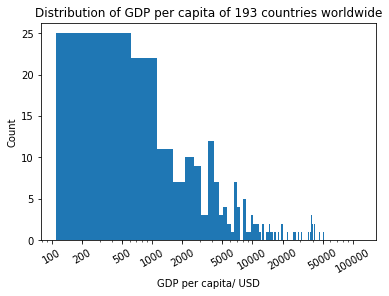

In [431]:
bin_edges=np.arange(111, 120000, 500)
plt.hist(df.groupby('country')['gdp'].mean(), bins=bin_edges)
ticks=[100,200,500,1000,2000,5000,10000,20000,50000,100000]
plt.xscale('log')
plt.xticks(ticks,ticks, rotation=30)
plt.xlabel('GDP per capita/ USD')
plt.ylabel('Count')
plt.title('Distribution of GDP per capita of 193 countries worldwide')

#### Due to the long tail of the `gdp` distribution, xscale is converted to a log scale.####
- The distribution is almost right skewed, with a peak around 500 USD.
- The peak shape is different from what we saw in the `life expectancy` histogram, suggesting GDP per capita may not be the best indicator of life expectancy.
- Subsequently, this histogram should be groupped by countries or selected for a certain year as some countries may change a lot over years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> GDP per capita will be more representative than the total GDP of a country, I added a new column to show this.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Outliners were found in `gdp` column as the author removed all the '0's when extracting numbers by comparing gdp from other data source. A new table `gdp_data` was collected from world bank and all the wrong values were replaced with the ones in the new table. Country names were changed to keep the consistency between the two tables for data operation. <br/>
> The `gdp` distribution has a long tail, so I transformed the scale to log.

## Bivariate Exploration


### Imagine you are the prime minister of a developing country (GDP per capita < 6000 USD) and is aiming at improving the life expectancy of people, which factor should you focus on?

Text(0.5,1,'Life expectancy over GDP per capita of countries worldwide')

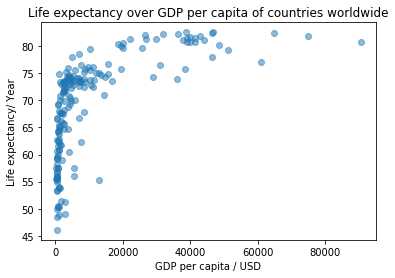

In [432]:
plt.scatter(df.groupby('country')['gdp'].mean(),df.groupby('country')['life-expectancy'].mean(), alpha=0.5)
plt.xlabel('GDP per capita / USD')
plt.ylabel('Life expectancy/ Year')
plt.title('Life expectancy over GDP per capita of countries worldwide')

- There is a increase tread of life expectancy associated with GDP but not linear.It increases fast in the beginning then reaches a plateau.
- We can try to focus on certain range of the GDP as there might be a threshold that GDP starts to be not so important as in the beginning.

Text(0.5,1,'Life expectancy over GDP per capita of countries worldwide')

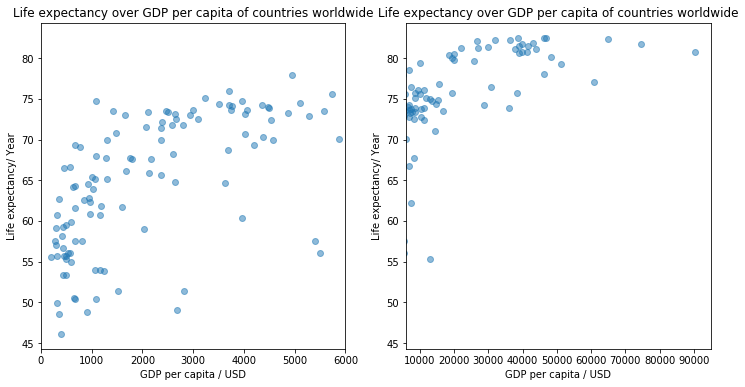

In [433]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df.groupby('country')['gdp'].mean(),df.groupby('country')['life-expectancy'].mean(), alpha=0.5)
plt.xlabel('GDP per capita / USD')
plt.ylabel('Life expectancy/ Year')
plt.xlim((0,6000))
plt.title('Life expectancy over GDP per capita of countries worldwide')
plt.subplot(1,2,2)
plt.scatter(df.groupby('country')['gdp'].mean(),df.groupby('country')['life-expectancy'].mean(), alpha=0.5)
plt.xlabel('GDP per capita / USD')
plt.ylabel('Life expectancy/ Year')
plt.xlim(6000,)
plt.title('Life expectancy over GDP per capita of countries worldwide')

- Now we take a closer look and can see the first subplot may have a postive correlation between GDP per capita and life expectancy.The richer countries in the second subplot seem to be on the same level.
- Does this mean when a country get rich enough then the GDP is not that important anymore?

In [335]:
# Again, the wrong values in mortality column. I have to download new dataset from WHO,http://apps.who.int/gho/data/view.main.182?lang=en.
mortality=pd.read_csv('../Children_motality.csv')
mortality.head()

Country  Year  \
0  Afghanistan  2017   
1  Afghanistan  2016   
2  Afghanistan  2015   
3  Afghanistan  2014   
4  Afghanistan  2013   

   Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)  \
0                                               51.5                                           
1                                               53.2                                           
2                                               54.9                                           
3                                               56.7                                           
4                                               58.7                                           

  Neonatal mortality rate (per 1000 live births)  \
0                                           39.2   
1                                           40.3   
2                                           41.5   
3                                           42.7   
4                                           44.0   

   Under-five mortality rate (probability of dying by age 5 per 1000 live births)  
0                                               67.9                               
1                                               70.4                               
2                                               73.1                               
3                                               76.0                               
4                                               79.2

In [343]:
set(df.country.unique())-set(mortality.Country.unique())

{'Swaziland'}

Glad to see I do not need to make many changes on the `country` column.

In [344]:
mortality['Country'].replace({'Eswatini':'Swaziland'}, inplace=True)

In [347]:
mortality.rename(str.lower, axis='columns', inplace=True)
df=df.merge(mortality[['country','year','under-five mortality rate (probability of dying by age 5 per 1000 live births)']], on=['country','year'])

In [352]:
df.rename(columns={'under-five mortality rate (probability of dying by age 5 per 1000 live births)':'under-5-death'}, inplace=True)
df.head()

country  year      status  life-expectancy  adult-mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant-deaths  alcohol  percentage-expenditure  hepatitis-b  measles   bmi  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five-deaths  polio  total-expenditure  diphtheria  hiv/aids  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          gdp  population  thinness--1-19-years  thinness-5-9-years  \
0  569.577923  33736494.0                  17.2                17.3   
1  629.345250    327582.0                  17.5                17.5   
2  638.612543  31731688.0                  17.7                17.7   
3  669.009051   3696958.0                  17.9                18.0   
4  603.537023   2978599.0                  18.2                18.2   

   income-composition-of-resources  schooling  under-5-death  
0                            0.479       10.1           73.1  
1                            0.476       10.0           76.0  
2                            0.470        9.9           79.2  
3                            0.463        9.8           82.6  
4                            0.454        9.5           86.2

### Let us take a look at another factor, the children death, as it can greatly lower the average life of the total population

Text(0.5,1,'Life expectancy over under 5-year-old death per 1000 lives worldwide')

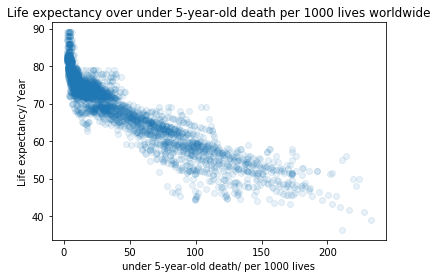

In [434]:
plt.scatter(df['under-5-death'],df['life-expectancy'], alpha=0.1)
plt.xlabel('under 5-year-old death/ per 1000 lives')
plt.ylabel('Life expectancy/ Year')
plt.title('Life expectancy over under 5-year-old death per 1000 lives worldwide')

- A clear negative correlation is found here between `life-expectancy` and `under-5-death`.
- To qualitify the correlation levels of GDP per capita and children death, we can use linear regression models to compare these two factors.

#### BMI can indicate the health status of one country, which may affect the life expectancy. <br/>When looking at the `bmi` values, the author of the dataset again made a mistake when extracting values. The '0's are left out as we can see bmi values lower than 10, which should be impossible. Also, bmi higher than 40 is impossible for a country. I replaced the wrong values with np.nan, but there should still be enough data to plot for a violin distribution.

In [308]:
df.query('bmi>40 or bmi<10')[['country','year','bmi']].head()

country  year   bmi
16  Albania  2015  58.0
17  Albania  2014  57.2
18  Albania  2013  56.5
19  Albania  2012  55.8
20  Albania  2011  55.1

In [310]:
mask = (df.bmi <10) | (df.bmi>40)
df.loc[mask, 'bmi'] = np.nan

In [312]:
df.bmi.describe()

count    1093.000000
mean       23.028728
std         7.338937
min        11.200000
25%        17.200000
50%        21.900000
75%        27.900000
max        39.900000
Name: bmi, dtype: float64

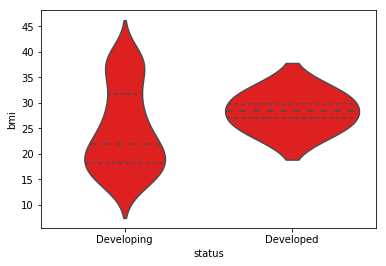

In [313]:
country_bmi=df.groupby(['country','status'])['bmi'].mean().reset_index()
sb.violinplot(data=country_bmi, x='status', y='bmi', color='r', inner='quartile')

- However, we cannot see a distinct difference between developing and developed countries, whilst the developed countries have shown higher life expectancy.
- Analysis of BMI seems to be a dead end as it associates with the food culture and life style factors which are not directly correlate to life expectancy.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a increase tread of life expectancy associated with GDP but not linear.It in crease faster in the beginning then reaches a plateau after gdp reaches around 5000 USD. <br/>
When looking at the under 5-year-old death ratios, we can see a clear negative correlation between the death ratio and life-expectancy, which means the children deaths contributes more to the life expectancy of a country.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> By looking at the violin plot of BMI and status, it is found that developed countries are averagely fatter than developing countries but developing countries have more extreme BMI values (too fat or too thin).

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

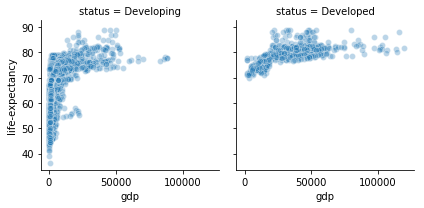

In [359]:
g = sb.FacetGrid(data = df, col = 'status')
g.map(sb.scatterplot, 'gdp', 'life-expectancy', alpha=0.3)

- By the status classification of `developed` and `developing` countries, we can clearly see differnt patterns between the two categories. However, we can see that the developing countries with high `gdp` share a similar trend like developed countries, which may suggest the `status` is not a good indicator to diffrentiate countries.
- We may create a customized `gdp` threshold as we said before to differentiate countries, for example, gdp low than 2500, gdp between 2500-20000, gdp higher than 20000.

(20000, 125181.09758449243)

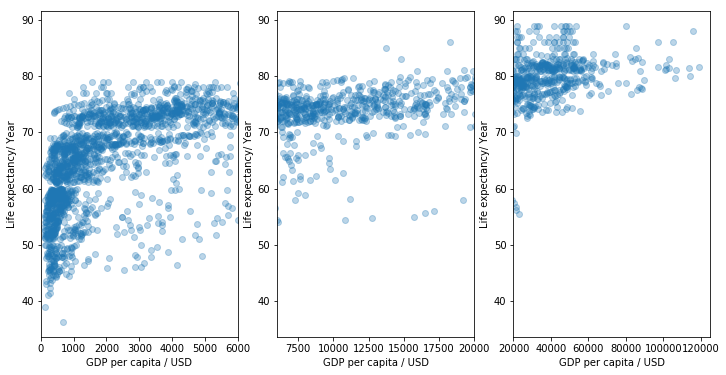

In [400]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.scatter(df['gdp'],df['life-expectancy'], alpha=0.3)
plt.xlabel('GDP per capita / USD')
plt.ylabel('Life expectancy/ Year')
plt.xlim((0,6000))

plt.subplot(1,3,2)
plt.scatter(df['gdp'],df['life-expectancy'], alpha=0.3)
plt.xlabel('GDP per capita / USD')
plt.ylabel('Life expectancy/ Year')
plt.xlim(6000,20000)

plt.subplot(1,3,3)
plt.scatter(df['gdp'],df['life-expectancy'], alpha=0.3)
plt.xlabel('GDP per capita / USD')
plt.ylabel('Life expectancy/ Year')
plt.xlim(20000,)

### Focus on year 2014 and plot regression line for `gdp` and `life-expectancy`. Look at the GDP per capita less than 6000 countries as there might be a positive linear correlation.

Text(0.5,1,'Linear regression of countries with GDP per capita less than 6000 USD in year 2014')

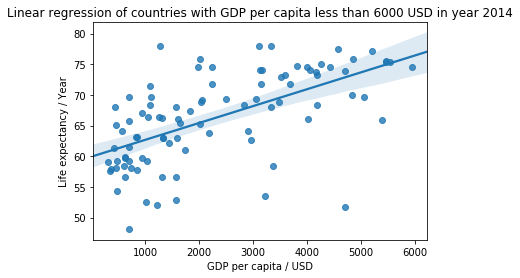

In [440]:
mask_2014=df.query('year==2014')

sb.regplot(mask_2014[mask_2014.gdp<6000]['gdp'], mask_2014[mask_2014.gdp<6000]['life-expectancy'])
plt.ylabel('Life expectancy / Year')
plt.xlabel('GDP per capita / USD')
plt.title('Linear regression of countries with GDP per capita less than 6000 USD in year 2014')

The figures here seem to reveal when at low gdp, the life-expectancy has a positive correlation when gdp increases.

In [442]:
import statsmodels.api as sm
df['intercept']=1

logit_mod= sm.OLS(mask_2014[mask_2014.gdp<6000]['life-expectancy'], mask_2014[mask_2014.gdp<6000][['gdp','intercept']])
result=logit_mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life-expectancy   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     52.12
Date:                Sun, 20 Jan 2019   Prob (F-statistic):           1.53e-10
Time:                        22:58:15   Log-Likelihood:                -295.42
No. Observations:                  93   AIC:                             594.8
Df Residuals:                      91   BIC:                             599.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdp            0.0027      0.000      7.219      0.000       0.002       0.004
intercept     59.9236      1.072     55.903      0.000      57.794      62.053
==============================================================================
Omnibus:                       13.219   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.303
Skew:                          -0.721   Prob(JB):                     0.000288
Kurtosis:                       4.459   Cond. No.                     4.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

However, when we try to use a linear model find the correlation between `gdp`(<6000) and `life-expectancy`, the correlation coefficiency is not so high(0.364). This means the relationship is not that strong that increasing gdp can help but not always to have higher life expectancy.

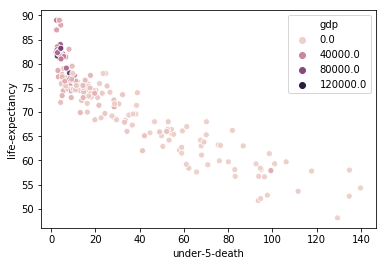

In [407]:
mask_2014=df.query('year==2014')
sb.scatterplot(data=mask_2014, y='life-expectancy', x='under-5-death', hue='gdp')

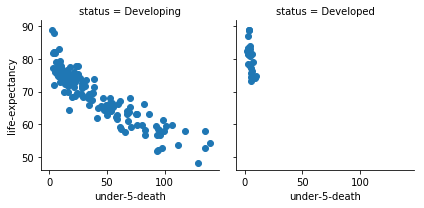

In [416]:
g=sb.FacetGrid(data = mask_2014, col = 'status')
g.map(plt.scatter, 'under-5-death','life-expectancy')

Scatter plotting with either `status` or `gdp` shows a similar distribution pattern of `under-5-death` and `life-expectancy`. This is probably because the definition of developed coutries is heavily dependent on gdp.

In [444]:
sb.regplot(mask_2014['under-5-death'], mask_2014['life-expectancy'])
plt.xlabel('Under 5-year-old death/ per 1000 lives')
plt.ylabel('Life expectancy/ Year')
plt.title('Life expectancy over under 5-year-old death per 1000 lives worldwide')

Text(0.5,1,'Life expectancy over under 5-year-old death per 1000 lives worldwide')

- The linear regression between children under 5-year-old death shows a good negative correlation to the life expectancy with a high $R^{2}$ of 0.813. This is the indicator we are looking for to gain a long life expectancy

- Can we still combine the GDP per capita factor as it still have some effect?

In [395]:
logit_mod= sm.OLS(mask_2014['life-expectancy'], mask_2014[['intercept','under-5-death']])
result=logit_mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life-expectancy   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     788.6
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           7.09e-68
Time:                        23:30:01   Log-Likelihood:                -498.53
No. Observations:                 183   AIC:                             1001.
Df Residuals:                     181   BIC:                             1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        79.2455      0.388    204.250      0.000      78.480      80.011
under-5-death    -0.2326      0.008    -28.082      0.000      -0.249      -0.216
==============================================================================
Omnibus:                       12.926   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.118
Skew:                           0.567   Prob(JB):                     0.000860
Kurtosis:                       3.753   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear regression of `under-5-death` and `life-expectancy` got a high correlation coefficiency of 0.813, which means improve the healthcare system for children can greatly increase the life expectancy of the country.

In [449]:
mask_gdp_2014=df.query('gdp<6000 and year==2014')
logit_mod= sm.OLS(mask_gdp_2014['life-expectancy'], mask_gdp_2014[['intercept','under-5-death','gdp']])
result=logit_mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life-expectancy   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 20 Jan 2019   Prob (F-statistic):           1.81e-35
Time:                        23:33:28   Log-Likelihood:                -233.81
No. Observations:                  93   AIC:                             473.6
Df Residuals:                      90   BIC:                             481.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        76.6756      1.199     63.942      0.000      74.293      79.058
under-5-death    -0.1956      0.012    -15.765      0.000      -0.220      -0.171
gdp           -9.711e-07      0.000     -0.004      0.997      -0.001       0.001
==============================================================================
Omnibus:                        0.053   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.215
Skew:                           0.011   Prob(JB):                        0.898
Kurtosis:                       2.765   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Now when we include one more variable `gdp` (when <6000 USD), the linear regression get better correlation with R-squared of 0.831. However, the p value of `gdp` of 0.997 suggests it is not so important to the life expectancy in this model.

- Now as a prime minister from a developing country (GDP per capita < 6000 USD), you should focus on reducing the children under 5-year-old death ratio to increase the life expectancy of the people. Of course GDP matters to your country, but will not help too much to increase the life expectancy. <br/>
<br/>
- We can use a simple linear model to predict the life expectancy as life expectancy = -0.2326* (under-5-death per 1000 lives) + 79.2455

What if we just look at whether a country is developing or developed. Is this a better indicator?

In [446]:
status=pd.get_dummies(df.status)
df_new=df.join(status)
mask_2014_gdp=df_new.query('year==2014')
logit_mod= sm.OLS(mask_2014_gdp['life-expectancy'], mask_2014_gdp[['intercept','under-5-death','Developing']])
result=logit_mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life-expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     483.0
Date:                Sun, 20 Jan 2019   Prob (F-statistic):           4.47e-73
Time:                        23:31:13   Log-Likelihood:                -482.73
No. Observations:                 183   AIC:                             971.5
Df Residuals:                     180   BIC:                             981.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        82.0852      0.604    135.849      0.000      80.893      83.278
under-5-death    -0.2133      0.008    -25.668      0.000      -0.230      -0.197
Developing       -4.2174      0.724     -5.824      0.000      -5.646      -2.789
==============================================================================
Omnibus:                        9.645   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.260
Skew:                           0.367   Prob(JB):                      0.00218
Kurtosis:                       4.034   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It is interesting the `status` variable did a good job in correlation of life-expectancy, even better than `gdp`(<6000) variable.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Based on the bivariate exploration we found strong correlation of children under 5-year-old death with life expectancy. Besides, we have observed a weak correlation between `gdp` and `life-expectancy` when gdp <6000 USD. The combination of the two variables enable us to obtain a linear regression model with higher $R^{2}$ value but the gdp is not a significant factor to predict the life expectancy of one country.

### Were there any interesting or surprising interactions between features?

> The status (developing or developed) of one country shows a good correlation with life expectancy, even better than my own variable of `gdp` < 6000 USD. Even though developed countries are also defined by gdp, which may suggest I can try different threshold of the gdp to get better regression.(Actually the p value of gdp become significant when higher than 30000 GDP per capita)